https://github.com/Data-Science-kosta/Speech-Emotion-Classification-with-PyTorch/blob/master/notebooks/stacked_cnn_lstm.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [ ]:
import os
import librosa
import librosa.display
from IPython.display import Audio
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
# ShEMO dir
ShEMO_dir = '/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset'
dataset_dir = os.listdir(ShEMO_dir)
print(dataset_dir)

['male', 'female']


In [ ]:
dir_name = os.path.join(ShEMO_dir, dataset_dir[0])
print(dir_name)
filenames = os.listdir(dir_name)
print(filenames)

file_name = os.path.join(ShEMO_dir, dataset_dir[0], filenames[20])
Audio(filename = file_name)

/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/male
['M21H02.wav', 'M21N01.wav', 'M21N02.wav', 'M21N03.wav', 'M21N04.wav', 'M21N06.wav', 'M21N07.wav', 'M21N08.wav', 'M21N09.wav', 'M21N10.wav', 'M21N11.wav', 'M21S01.wav', 'M21W01.wav', 'M21W02.wav', 'M21W03.wav', 'M21W04.wav', 'M21W05.wav', 'M21W06.wav', 'M21W07.wav', 'M22A01.wav', 'M22A02.wav', 'M22A03.wav', 'M22A04.wav', 'M22A05.wav', 'M22A06.wav', 'M22H01.wav', 'M22N01.wav', 'M22N02.wav', 'M22N03.wav', 'M22N04.wav', 'M22N05.wav', 'M22N06.wav', 'M22N07.wav', 'M22N08.wav', 'M22N09.wav', 'M22N10.wav', 'M22N11.wav', 'M22N12.wav', 'M22N13.wav', 'M22N14.wav', 'M22N15.wav', 'M22N16.wav', 'M22N17.wav', 'M22N18.wav', 'M22N19.wav', 'M22N20.wav', 'M22N21.wav', 'M22N22.wav', 'M22N23.wav', 'M22N24.wav', 'M22N25.wav', 'M22N26.wav', 'M22N27.wav', 'M22N28.wav', 'M22N29.wav', 'M22N30.wav', 'M22N31.wav', 'M22S01.wav', 'M22S02.wav', 'M22S03.wav', 'M22W01.wav', 'M22W02.wav', 'M22W03.wav', 'M22W04.wav', 'M23A01.wav', 'M23A02.wav', 'M23H01.wav', '

# **PreProcessing**

In [ ]:
male_utteranceses_dir = os.path.join(ShEMO_dir, dataset_dir[0])
female_utteranceses_dir = os.path.join(ShEMO_dir, dataset_dir[1])
print(male_utteranceses_dir)
print(female_utteranceses_dir)

/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/male
/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/female


In [ ]:
EMOTIONS = {'H':1, 'N':2, 'A':3, 'S':4, 'W':5, 'F':6}

**Males descriptions**

In [ ]:
# male
male_dir_list = []
male_filenames_list = []
male_emotions_list = []
male_emotions_numerical_list = []
male_datasat = pd.DataFrame([])
for filenames in os.listdir(male_utteranceses_dir):
  male_filenames_list.append(filenames)
  male_dir_list.append(os.path.join(male_utteranceses_dir, filenames))
  male_emotions_list.append(filenames[3])

  male_emotions_numerical_list.append(EMOTIONS[filenames[3]])

male_datasat['Names'] = male_filenames_list
male_datasat['Genders'] = ['M' for _ in range(len(male_filenames_list))]
male_datasat['Emotions'] = male_emotions_list
male_datasat['NEmotions'] = male_emotions_numerical_list
male_datasat['Dirs'] = male_dir_list

male_datasat

,Names,Genders,Emotions,NEmotions,Dirs
0,M21H02.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1,M21N01.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
2,M21N02.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
3,M21N03.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
4,M21N04.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
...,...,...,...,...,...
1732,M21A02.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1733,M21A03.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1734,M21A04.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1735,M21F01.wav,M,F,6,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...


In [ ]:
count = male_datasat.value_counts('Emotions')
print(count)

Emotions
N    744
A    604
S    178
W    105
H     90
F     16
dtype: int64


Text(0, 0.5, 'Number of examples')

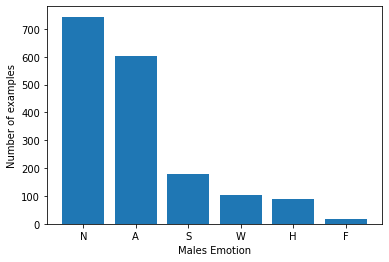

In [ ]:
count = male_datasat.value_counts('Emotions')
indexes = list(count.index)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x=range(6), height=count)
ax.set_xticks(ticks=range(6))
ax.set_xticklabels(indexes,fontsize=10)
ax.set_xlabel('Males Emotion')
ax.set_ylabel('Number of examples')

**females Descriptions**

In [ ]:
# female
female_dir_list = []
female_filenames_list = []
female_emotions_list = []
female_emotions_numerical_list = []
female_datasat = pd.DataFrame([])
for filenames in os.listdir(female_utteranceses_dir):
  female_filenames_list.append(filenames)
  female_dir_list.append(os.path.join(female_utteranceses_dir, filenames))
  female_emotions_list.append(filenames[3])

  female_emotions_numerical_list.append(EMOTIONS[filenames[3]])

female_datasat['Names'] = female_filenames_list
female_datasat['Genders'] = ['M' for _ in range(len(female_filenames_list))]
female_datasat['Emotions'] = female_emotions_list
female_datasat['NEmotions'] = female_emotions_numerical_list
female_datasat['Dirs'] = female_dir_list

female_datasat

,Names,Genders,Emotions,NEmotions,Dirs
0,F07A01.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1,F07A02.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
2,F07A03.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
3,F07A04.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
4,F07A05.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
...,...,...,...,...,...
1258,F06S08.wav,M,S,4,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1259,F06S09.wav,M,S,4,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1260,F06W01.wav,M,W,5,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1261,F06W02.wav,M,W,5,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...


In [ ]:
count = female_datasat.value_counts('Emotions')
print(count)

Emotions
A    455
N    284
S    271
W    120
H    111
F     22
dtype: int64


Text(0, 0.5, 'Number of examples')

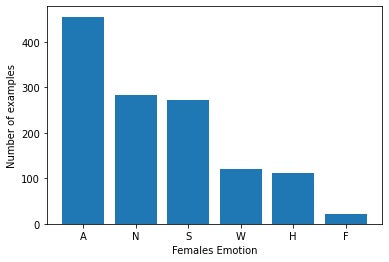

In [ ]:
count = female_datasat.value_counts('Emotions')
indexes = list(count.index)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x=range(6), height=count)
ax.set_xticks(ticks=range(6))
ax.set_xticklabels(indexes,fontsize=10)
ax.set_xlabel('Females Emotion')
ax.set_ylabel('Number of examples')

In [ ]:
dataset = pd.concat([male_datasat, female_datasat])
dataset

,Names,Genders,Emotions,NEmotions,Dirs
0,M21H02.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1,M21N01.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
2,M21N02.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
3,M21N03.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
4,M21N04.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
...,...,...,...,...,...
1258,F06S08.wav,M,S,4,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1259,F06S09.wav,M,S,4,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1260,F06W01.wav,M,W,5,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...
1261,F06W02.wav,M,W,5,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...


Emotions
A    1059
N    1028
S     449
W     225
H     201
F      38
dtype: int64


Text(0, 0.5, 'Number of examples')

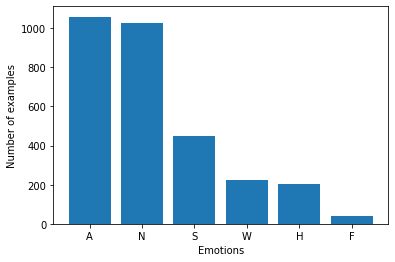

In [ ]:
count = dataset.value_counts('Emotions')
print(count)
indexes = list(count.index)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x=range(6), height=count)
ax.set_xticks(ticks=range(6))
ax.set_xticklabels(indexes,fontsize=10)
ax.set_xlabel('Emotions')
ax.set_ylabel('Number of examples')

**Get utterances duration**

In [ ]:
!pip install wavinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 631 kB 31.5 MB/s 
     |████████████████████████████████| 109 kB 69.5 MB/s 
     |████████████████████████████████| 6.4 MB 49.4 MB/s 
     |████████████████████████████████| 546 kB 39.7 MB/s 
  Created wheel for ear: filename=ear-2.1.0-py3-none-any.whl size=668352 sha256=e53d384d2759bce6f0d86594705f48202048bd0de3f4e1e0c0f33f0595bdd08d
  Stored in directory: /root/.cache/pip/wheels/07/70/1e/67526c82388980847f2c15ea93273759428af4107715b642ac
Successfully built ear
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from wavinfo import WavInfoReader
from tqdm import tqdm

In [ ]:
# Update dataset with duration

utterance_byte_list = []

with tqdm(total=dataset.shape[0]) as bar:
  for path in list(dataset.Dirs):
    info = WavInfoReader(path)
    utterance_byte = info.data.byte_count
    utterance_byte_list.append(utterance_byte)

    bar.update(1)

dataset['Bytes'] = utterance_byte_list

100%|██████████| 3000/3000 [42:12<00:00,  1.18it/s]


In [ ]:
dataset

NameError: ignored

In [ ]:
%ls /content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/

dataset_full_details.csv


In [ ]:
save_dir = '/content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/'
file_name = os.path.join(save_dir, 'dataset_full_details.csv')

In [ ]:
# Save dataset full info
with open(file_name, 'w') as file:
  dataset.to_csv(file, index=False)

In [ ]:
# Load dataset full info
with open(file_name, 'r') as file:
  dataset = pd.read_csv(file)

In [ ]:
dataset

,Names,Genders,Emotions,NEmotions,Dirs,Bytes
0,M21H02.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,130108
1,M21N01.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,193402
2,M21N02.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,277422
3,M21N03.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,204326
4,M21N04.wav,M,N,2,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,191844
...,...,...,...,...,...,...
2995,F06S08.wav,M,S,4,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,647502
2996,F06S09.wav,M,S,4,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,114976
2997,F06W01.wav,M,W,5,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,54608
2998,F06W02.wav,M,W,5,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,637624


In [ ]:
print(f'Max Bytes: {dataset.Bytes.max()}, Max duration: {dataset.Bytes.max()/(44100*2)}s')
print(f'File name: {dataset.Dirs[dataset.Bytes.argmax()]}')
print('***********************************************************************')
print(f'Min Bytes: {dataset.Bytes.min()}, Min duration: {dataset.Bytes.min()/(44100*2)}s')
print(f'File name: {dataset.Dirs[dataset.Bytes.argmin()]}')
print('***********************************************************************')

Max Bytes: 2939530, Max duration: 33.32800453514739s
File name: /content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/male/M51N20.wav
***********************************************************************
Min Bytes: 30202, Min duration: 0.34242630385487527s
File name: /content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/male/M48W01.wav
***********************************************************************


In [ ]:
file_size_details = {}
for size in dataset.Bytes:
  try:
    file_size_details[int(np.ceil(size/(44100*2)))] +=1
  except:
    file_size_details[int(np.ceil(size/(44100*2)))] = 1

file_size_details

{1: 157,
 2: 682,
 3: 679,
 4: 448,
 5: 293,
 6: 222,
 7: 129,
 8: 100,
 9: 72,
 10: 43,
 11: 42,
 12: 33,
 13: 21,
 14: 15,
 15: 14,
 16: 7,
 17: 5,
 18: 6,
 19: 5,
 20: 4,
 21: 6,
 22: 6,
 23: 2,
 24: 2,
 25: 1,
 27: 1,
 28: 3,
 34: 2}

Text(0, 0.5, 'Number of sounds')

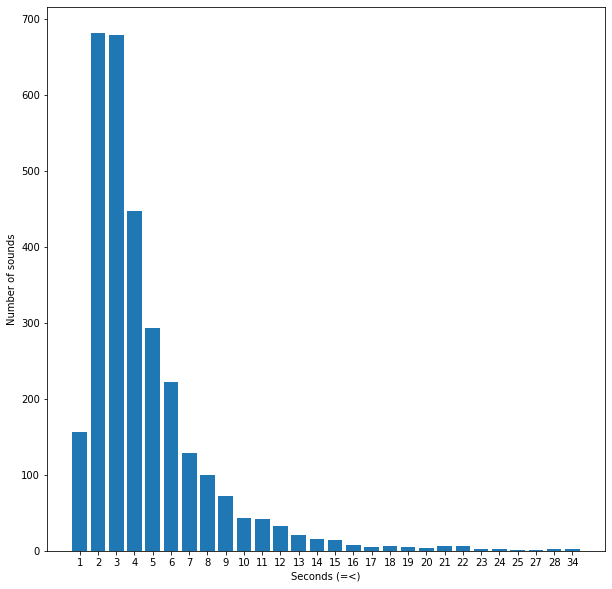

In [ ]:
count = list(file_size_details.values())
indexes = list(file_size_details.keys())

indexes, count = zip(*sorted(zip(indexes, count)))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar(x=range(len(count)), height=count)
ax.set_xticks(ticks=range(len(count)))
ax.set_xticklabels(indexes,fontsize=10)
ax.set_xlabel('Seconds (=<)')
ax.set_ylabel('Number of sounds')

# **New Dataset with 4 classes and specific duration**

Oreginal dataset: </br>
Emotions</br>
A    1059</br>
N    1028</br>
S     449</br>
W     225</br>
H     201</br>
F      38</br>

In [ ]:
new_index = []
new_index += [i for i in range(dataset.shape[0]) if dataset.Emotions[i] == 'A']
new_index += [i for i in range(dataset.shape[0]) if dataset.Emotions[i] == 'N']
new_index += [i for i in range(dataset.shape[0]) if dataset.Emotions[i] == 'S']
new_index += [i for i in range(dataset.shape[0]) if dataset.Emotions[i] == 'H']
len(new_index)

2737

In [ ]:
new_dataset = dataset.iloc[new_index]
new_dataset = new_dataset.reset_index(drop=True)
new_dataset

,Names,Genders,Emotions,NEmotions,Dirs,Bytes
0,M22A01.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,215832
1,M22A02.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232662
2,M22A03.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,44974
3,M22A04.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232916
4,M22A05.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,164940
...,...,...,...,...,...,...
2732,F06H04.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,320420
2733,F06H05.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,131336
2734,F06H06.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,224000
2735,F06H09.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,619076


In [ ]:
print(f'Max Bytes: {new_dataset.Bytes.max()}, Max duration: {new_dataset.Bytes.max()/(44100*2)}s')
print(f'File name: {new_dataset.Dirs[new_dataset.Bytes.argmax()]}')
print('***********************************************************************')
print(f'Min Bytes: {new_dataset.Bytes.min()}, Min duration: {new_dataset.Bytes.min()/(44100*2)}s')
print(f'File name: {new_dataset.Dirs[new_dataset.Bytes.argmin()]}')
print('***********************************************************************')

Max Bytes: 2939530, Max duration: 33.32800453514739s
File name: /content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/male/M51N20.wav
***********************************************************************
Min Bytes: 39326, Min duration: 0.44587301587301587s
File name: /content/MyDrive/MyDrive/Databases/ShEMO/ShEMO_dataset/male/M03A10.wav
***********************************************************************


In [ ]:
new_file_size_details = {}
for size in new_dataset.Bytes:
  try:
    new_file_size_details[int(np.ceil(size/(44100*2)))] +=1
  except:
    new_file_size_details[int(np.ceil(size/(44100*2)))] = 1

new_file_size_details

{1: 75,
 2: 593,
 3: 626,
 4: 437,
 5: 280,
 6: 217,
 7: 125,
 8: 97,
 9: 70,
 10: 43,
 11: 41,
 12: 33,
 13: 21,
 14: 15,
 15: 14,
 16: 7,
 17: 5,
 18: 6,
 19: 5,
 20: 4,
 21: 6,
 22: 6,
 23: 2,
 24: 2,
 25: 1,
 27: 1,
 28: 3,
 34: 2}

Text(0, 0.5, 'Number of sounds')

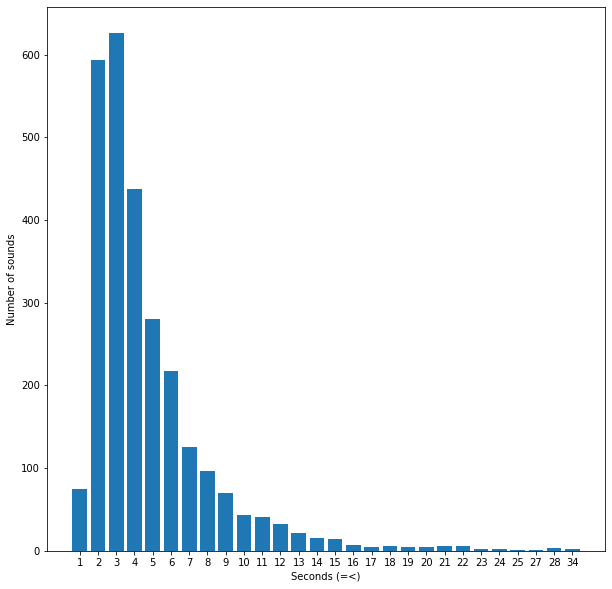

In [ ]:
count = list(new_file_size_details.values())
indexes = list(new_file_size_details.keys())

indexes, count = zip(*sorted(zip(indexes, count)))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar(x=range(len(count)), height=count)
ax.set_xticks(ticks=range(len(count)))
ax.set_xticklabels(indexes,fontsize=10)
ax.set_xlabel('Seconds (=<)')
ax.set_ylabel('Number of sounds')

In [ ]:
sr = 44100
min_size, max_size = 1, 6

n_selected_sound = np.sum([new_file_size_details[i] for i in range(min_size+1,max_size+1)])
print(f'Number of sounds selected: {n_selected_sound}')

# make new dataset with specific size
new_dataset = new_dataset
new_lindex_list = []
for index, file_name, size in zip(new_dataset.index, new_dataset.Dirs, new_dataset.Bytes):
  if size >= min_size*(sr*2) and size <= max_size*(sr*2):
    new_lindex_list.append(index)
    #print(index, file_name, size)

print(f'Number of sounds selected: {len(new_lindex_list)}')

new_dataset = new_dataset.iloc[new_lindex_list].copy()

new_dataset = new_dataset.reset_index(drop=True)
new_dataset

Number of sounds selected: 2153
Number of sounds selected: 2153


,Names,Genders,Emotions,NEmotions,Dirs,Bytes
0,M22A01.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,215832
1,M22A02.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232662
2,M22A04.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232916
3,M22A05.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,164940
4,M23A01.wav,M,A,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,137208
...,...,...,...,...,...,...
2148,F06H03.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,117000
2149,F06H04.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,320420
2150,F06H05.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,131336
2151,F06H06.wav,M,H,1,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,224000


In [ ]:
print(new_dataset.value_counts('Emotions'))
print(f'Sum: {sum(new_dataset.Emotions.value_counts())}')

Emotions
A    884
N    777
S    324
H    168
dtype: int64
Sum: 2153


**Refresh Emotions label**

In [ ]:
Labels = {'A':0, 'N':1, 'S':2, 'H':3}
emotions_list = []
for emotion in new_dataset.Emotions:
  emotions_list.append(Labels[emotion])

new_dataset.NEmotions = emotions_list
new_dataset

,Names,Genders,Emotions,NEmotions,Dirs,Bytes
0,M22A01.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,215832
1,M22A02.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232662
2,M22A04.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232916
3,M22A05.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,164940
4,M23A01.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,137208
...,...,...,...,...,...,...
2148,F06H03.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,117000
2149,F06H04.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,320420
2150,F06H05.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,131336
2151,F06H06.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,224000


**Save new_dataset**

In [ ]:
save_dir = '/content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/'
new_file_name = os.path.join(save_dir, 'new_dataset_specifics_details.csv')

In [ ]:
# Save dataset full info
with open(new_file_name, 'w') as file:
  new_dataset.to_csv(file, index=False)

In [ ]:
# Load dataset full info
with open(new_file_name, 'r') as file:
  new_dataset = pd.read_csv(file)

In [ ]:
new_dataset

,Names,Genders,Emotions,NEmotions,Dirs,Bytes
0,M22A01.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,215832
1,M22A02.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232662
2,M22A04.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,232916
3,M22A05.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,164940
4,M23A01.wav,M,A,0,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,137208
...,...,...,...,...,...,...
2148,F06H03.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,117000
2149,F06H04.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,320420
2150,F06H05.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,131336
2151,F06H06.wav,M,H,3,/content/MyDrive/MyDrive/Databases/ShEMO/ShEMO...,224000


In [ ]:
def getMELspectrogram(audio, sample_rate):
    mel_spec = librosa.feature.melspectrogram(y=audio,
                                              sr=sample_rate,
                                              n_fft=1024,
                                              win_length = 512,
                                              window='hamming',
                                              hop_length = 256,
                                              n_mels=128,
                                              fmax=sample_rate/2
                                             )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

In [ ]:
from tqdm import tqdm

new_lindex_list = new_dataset.index
shuffle_new_lindex_list = np.random.permutation(new_lindex_list)

# make 6 second fix utterance
Duration = 6
mels = []
labels = []
SAMPLE_RATE = 44100
i = 0
with tqdm(total=new_dataset.shape[0]) as bar:
  for index, emotion in zip(shuffle_new_lindex_list, new_dataset.NEmotions[shuffle_new_lindex_list]):
      i += 1
      labels.append(emotion)

      file_path = new_dataset.Dirs[index]
      audio, sample_rate = librosa.load(file_path, duration=Duration, offset=0, sr=SAMPLE_RATE)
      signal = np.zeros((int(SAMPLE_RATE*Duration,)))
      signal[:len(audio)] = audio

      # mel spectrogram
      mel_sig = getMELspectrogram(signal, sample_rate)

      mels.append(mel_sig)
      #print("\r Processed {}/{} files".format(i+1,len(shuffle_new_lindex_list)),end='')

      bar.update(1)
mels = np.stack(mels,axis=0)

100%|██████████| 2153/2153 [12:31<00:00,  2.87it/s]


# **Split into chunks**

In [ ]:
def splitIntoChunks(mel_spec,win_size,stride):
    t = mel_spec.shape[-1]
    num_of_chunks = int(t/stride)
    chunks = []
    for i in range(num_of_chunks):
        chunk = mel_spec[:, :, i*stride:i*stride+win_size]
        if chunk.shape[-1] == win_size:
            chunks.append(chunk)
    return np.stack(chunks,axis=1) # sample, time step, feature, feature

In [ ]:
mel_in_time_step = splitIntoChunks(mels, 128, 64)
print(f'data shape: {mel_in_time_step.shape}')
del mels

data shape: (2153, 15, 128, 128)


In [ ]:
print(f'data shape: {mel_in_time_step.shape}')

data shape: (2153, 15, 128, 128)


In [ ]:
train_size, valid_size, test_size = 0.7, 0.2, 0.1
m = len(shuffle_new_lindex_list)

start, stop = int(0), int(train_size*m)
X_train, Y_train = mel_in_time_step[start:stop, :, :, :], np.expand_dims(np.array(labels[start:stop]), axis=1)

start, stop = stop, int((train_size+valid_size)*m)
X_valid, Y_valid = mel_in_time_step[start:stop, :, :, :], np.expand_dims(np.array(labels[start:stop]), axis=1)

start, stop = stop, m
X_test, Y_test = mel_in_time_step[start:stop, :, :, :], np.expand_dims(np.array(labels[start:stop]), axis=1)

print(f'Train Shape: {X_train.shape, Y_train.shape}')
print(f'Valid Shape: {X_valid.shape, Y_valid.shape}')
print(f'Test Shape: {X_test.shape, Y_test.shape}')

del mel_in_time_step

Train Shape: ((1507, 15, 128, 128), (1507, 1))
Valid Shape: ((430, 15, 128, 128), (430, 1))
Test Shape: ((216, 15, 128, 128), (216, 1))


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print(f'Train Shape: {X_train.shape, Y_train.shape}')
print(f'Valid Shape: {X_valid.shape, Y_valid.shape}')
print(f'Test Shape: {X_test.shape, Y_test.shape}')

Train Shape: ((1507, 15, 1, 128, 128), (1507, 1))
Valid Shape: ((430, 15, 1, 128, 128), (430, 1))
Test Shape: ((216, 15, 1, 128, 128), (216, 1))


<Figure size 720x720 with 0 Axes>

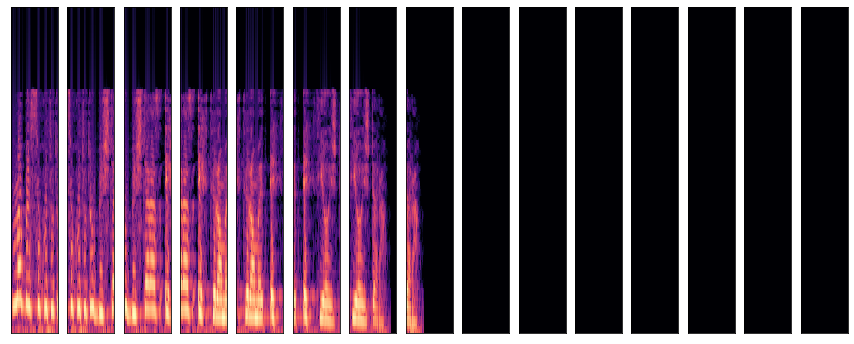

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(nrows=1, ncols=15, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(15)
img = []
for i in range(15):
  img = librosa.display.specshow(X_train[0,i,0,:,:], ax=ax[i])

# **Create Model**

In [ ]:
import torch
import torch.nn as nn

# TimeDistributed layer
# batch first
class TimeDistributed(nn.Module):
  def __init__(self, module):
    super(TimeDistributed, self).__init__()
    self.module = module

  def forward(self, x):
    # x -> (batch, timesample, feature map1, feature map2)
    # y <- (batch, timesample, feature map1, feature map2)
    x_size = x.size()
    x = x.contiguous().view(-1 , x_size[-3], x_size[-2], x_size[-1])
    y = self.module(x)
    y = y.contiguous().view(-1, x_size[1], y.size(-3), y.size(-2), y.size(-1))
    return y

In [ ]:
class ShEMOModel(nn.Module):
  def __init__(self, n_emotions):
    super(ShEMOModel, self).__init__()

    Cb1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
    BNb1 = nn.BatchNorm2d(16)
    Actb1 = nn.ReLU()
    MPb1 = nn.MaxPool2d(kernel_size=2, stride=2) # 64*64
    Db1 = nn.Dropout(p=0.4)

    Cb2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
    BNb2 = nn.BatchNorm2d(32)
    Actb2 = nn.ReLU()
    MPb2 = nn.MaxPool2d(kernel_size=4, stride=4) #16*16
    Db2 = nn.Dropout(p=0.3)

    Cb3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    BNb3 = nn.BatchNorm2d(64)
    Actb3 = nn.ReLU()
    MPb3 = nn.MaxPool2d(kernel_size=4, stride=4) # 4*4
    Db3 = nn.Dropout(p=0.3)

    Cb4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    BNb4 = nn.BatchNorm2d(128)
    Actb4 = nn.ReLU()
    MPb4 = nn.MaxPool2d(kernel_size=4, stride=4) # 1*1
    Db4 = nn.Dropout(p=0.3)

    B1 = TimeDistributed(nn.Sequential(Cb1, BNb1, Actb1, MPb1, Db1))
    B2 = TimeDistributed(nn.Sequential(Cb2, BNb2, Actb2, MPb2, Db2))
    B3 = TimeDistributed(nn.Sequential(Cb3, BNb3, Actb3, MPb3, Db3))
    #B4 = TimeDistributed(nn.Sequential(Cb4, BNb4, Actb4, MPb4, Db4))

    self.CNNBlock = nn.Sequential(B1, B2, B3)#, B4)

    self.LSTM1 = nn.LSTM(input_size=64*4*4, hidden_size=64, bidirectional=True, batch_first=True)
    self.DLSTM1 = nn.Dropout(p=0.2)

    F1 = nn.Linear(in_features=64*2, out_features=32)
    F2 = nn.Linear(in_features=32, out_features=n_emotions)
    self.FC = nn.Sequential(F1, F2)

  def forward(self, x):
    features = self.CNNBlock(x)
    flat_feature = torch.flatten(features, start_dim=2)
    lstm, _ = self.LSTM1(flat_feature)
    drop_lstm = self.DLSTM1(lstm[:,-1,:])
    fc = self.FC(drop_lstm)
    return nn.functional.softmax(fc, dim=-1)

# **Train Function**

In [ ]:
def cross_loss(prediction, target):
  loss = nn.CrossEntropyLoss()
  return loss(input=prediction, target=target)

def train_step(model, optimizer, loss_fnc):
  def train_model(x_train, y_train):
    model.train()

    # forward
    y_softmax = model(x_train)
    y_pred = torch.argmax(y_softmax, dim=-1)
    y_train = torch.squeeze(y_train)
    #y_pred = torch.unsqueeze(y_pred, dim=-1)

    loss = cross_loss(y_softmax, y_train)
    accuracy = torch.sum(y_train==y_pred, dim=-1)/float(y_train.shape[0])

    # backward
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return loss.item(), accuracy*100
  return train_model

def validation_function(model, loss_fnc):
  def validation(x_valid, y_valid):
    with torch.no_grad():
      model.eval()

      loss_list = []
      accuracy_list = []
      # forward
      for x_v, y_v in zip(x_valid, y_valid):
        x_v, y_v = torch.unsqueeze(x_v, dim=0), torch.unsqueeze(y_v, dim=0)

        y_softmax = model(x_v)
        y_pred = torch.argmax(y_softmax, dim=-1)
        y_v = torch.squeeze(y_v, dim=-1)

        loss = cross_loss(y_softmax, y_v)
        loss_list.append(loss.item())

        accuracy = torch.sum(y_v==y_pred, dim=-1)/float(y_v.shape[0])
        accuracy_list.append(accuracy)

    return sum(loss_list)/float(len(loss_list)), (sum(accuracy_list)/float(len(accuracy_list)))*100.0
  return validation

In [ ]:
from time import time
import numpy as np

# Epochs learning
class Compile():
  def __init__(self, model, loss_fnc, optimizer):
    self.model = model
    self.loss_fun = loss_fnc
    self.optimizer = optimizer

    self.trainer = train_step(model, optimizer, loss_fnc)
    self.evaluator = validation_function(model, loss_fnc)

  # x_train and y_train are tensor
  def train(self, x_train, y_train, batch_size, epochs, x_valid, y_valid):
    loss_list = []
    acc_list = []
    ev_loss_list = []
    ev_acc_list = []
    for epoch in range(epochs):
      start_time = time()

      n_data = x_train.size(0)
      data_index = np.arange(n_data)
      data_index = np.random.permutation(data_index)
      data_index_batch = np.split(data_index[:(n_data//batch_size)*batch_size], indices_or_sections=n_data//batch_size)

      batch_loss_list = []
      batch_acc_list = []
      for i, batch in enumerate(data_index_batch):
        x_batch, y_batch = x_train[batch,:,:,:], y_train[batch,:]
        batch_loss, batch_accuracy = self.trainer(x_batch, y_batch)

        del x_batch, y_batch

        batch_loss_list.append(float(batch_loss))
        batch_acc_list.append(float(batch_accuracy))

        print(f'\r Epoch:{epoch+1} ---- Batch:{i+1}/{n_data//batch_size}',end='')

      #print(batch_loss_list)
      loss_list.append(sum(batch_loss_list)/len(batch_loss_list))
      acc_list.append(sum(batch_acc_list)/len(batch_acc_list))

      ev_loss, ev_acc = self.evaluator(x_valid, y_valid)

      ev_loss_list.append(ev_loss)
      ev_acc_list.append(ev_acc)

      print(f'\r Epoch:{epoch+1}-Time:{int(time()-start_time)}s ---- Acc:{acc_list[-1]}%, Loss:{loss_list[-1]} ,ValAcc:{ev_acc_list[-1]}%, ValLoss:{ev_loss_list[-1]}')
    return loss_list, acc_list, ev_loss_list, ev_acc_list


In [ ]:
#del x_train, y_train, x_valid, y_valid
del optimizer, loss_fnc, model
del learner
#torch.cuda.empty_cache()
torch.cuda.empty_cache()

In [ ]:
torch.cuda.empty_cache()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train = torch.tensor(X_train,device=device).float()
y_train = torch.tensor(Y_train, dtype=torch.long,device=device)
del X_train, Y_train

x_valid = torch.tensor(X_valid,device=device).float()
y_valid = torch.tensor(Y_valid, dtype=torch.long, device=device)
del X_valid, Y_valid

print(f'Train Shape: {x_train.size(), y_train.size()}')
print(f'Valid Shape: {x_valid.size(), y_valid.size()}')

Train Shape: (torch.Size([1507, 15, 1, 128, 128]), torch.Size([1507, 1]))
Valid Shape: (torch.Size([430, 15, 1, 128, 128]), torch.Size([430, 1]))


In [ ]:
BATCH_SIZE = 16
LR = 1e-4
NEmotions = 4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 500

model = ShEMOModel(n_emotions=NEmotions).to(device)
loss_fnc = cross_loss
optimizer = torch.optim.Adam(model.parameters(),lr=LR)

learner = Compile(model=model, loss_fnc=cross_loss, optimizer=optimizer)

history = learner.train(x_train, y_train, BATCH_SIZE, EPOCHS, x_valid, y_valid)

 Epoch:1-Time:7s ---- Acc:39.8936170212766%, Loss:1.3224926552873977 ,ValAcc:42.09302520751953%, ValLoss:1.293835022005924
 Epoch:2-Time:7s ---- Acc:41.090425531914896%, Loss:1.2926287232561315 ,ValAcc:42.09302520751953%, ValLoss:1.283424729247426
 Epoch:3-Time:7s ---- Acc:41.223404255319146%, Loss:1.2808801417655133 ,ValAcc:42.32558059692383%, ValLoss:1.2802286369856013
 Epoch:4-Time:7s ---- Acc:40.558510638297875%, Loss:1.2833075777013252 ,ValAcc:42.79069900512695%, ValLoss:1.2787899934968283
 Epoch:5-Time:7s ---- Acc:41.68882978723404%, Loss:1.2794630400677944 ,ValAcc:42.32558059692383%, ValLoss:1.275880329830702
 Epoch:6-Time:7s ---- Acc:42.087765957446805%, Loss:1.27678282717441 ,ValAcc:43.02325439453125%, ValLoss:1.2743858187697654
 Epoch:7-Time:7s ---- Acc:42.952127659574465%, Loss:1.27630308460682 ,ValAcc:43.02325439453125%, ValLoss:1.2731668386348458
 Epoch:8-Time:7s ---- Acc:43.88297872340426%, Loss:1.2705224803153505 ,ValAcc:43.488372802734375%, ValLoss:1.2633852626002111
 E

# **Test**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_test_tensor = torch.tensor(X_test,device=device).float()
Y_test_tensor = torch.tensor(Y_test,dtype=torch.long,device=device)

#del X_test, Y_test

validate = validation_function(model, cross_loss)
test_loss, test_acc = validate(X_test_tensor,Y_test_tensor)
print(f'Test loss is {test_loss:.3f}')
print(f'Test accuracy is {test_acc:.2f}%')

Test loss is 1.139
Test accuracy is 59.72%


# **Test2**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_test_tensor = torch.tensor(X_test,device=device).float()
Y_test_tensor = torch.tensor(Y_test,dtype=torch.long,device=device)

#del X_test, Y_test

validate = validation_function(model, cross_loss)
test_loss, test_acc = validate(X_test_tensor,Y_test_tensor)
print(f'Test loss is {test_loss:.3f}')
print(f'Test accuracy is {test_acc:.2f}%')

Test loss is 1.122
Test accuracy is 61.11%


In [ ]:
# path
weights_dir = '/content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/weights/'
file_name = '3cnn_Bilstm_model_500_epochs_batch_16.pt'

os.makedirs(weights_dir,exist_ok=True)
torch.save(model.state_dict(),os.path.join(weights_dir,file_name))
print('Model is saved to {}'.format(os.path.join(weights_dir,file_name)))

Model is saved to /content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/weights/3cnn_Bilstm_model_500_epochs_batch_16.pt


In [ ]:
for module in model.modules():
  print(module)

ShEMOModel(
  (CNNBlock): Sequential(
    (0): TimeDistributed(
      (module): Sequential(
        (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (4): Dropout(p=0.4, inplace=False)
      )
    )
    (1): TimeDistributed(
      (module): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
        (4): Dropout(p=0.3, inplace=False)
      )
    )
    (2): TimeDistributed(
      (module): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum

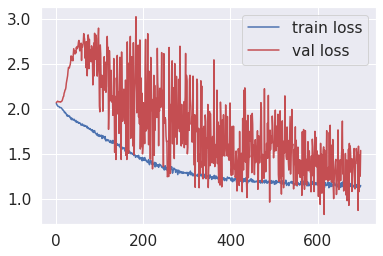

In [ ]:
plt.plot(losses,'b')
plt.plot(val_losses,'r')
plt.legend(['train loss','val loss'])

In [ ]:
from torch.utils.tensorboard import SummaryWriter

# path
board_dir = '/content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/Board/'
os.makedirs(board_dir,exist_ok=True)

writer = SummaryWriter(board_dir)

X = torch.zeros(size=(32,15,1,128,128), device=device).float()
net = model
writer.add_graph(net, X)
writer.close()

In [ ]:
!pip install tensorboard
%load_ext tensorboard
%tensorboard --logdir /content/MyDrive/MyDrive/SpeechProcessing/DNN/LSTM/ShEMO_save/Board/